In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import zipfile
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


# Set plot style
plt.style.use('ggplot')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahsadorri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mahsadorri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mahsadorri/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/mahsadorri/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mahsadorri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:

# Load the dataset from a zipped CSV file
with zipfile.ZipFile('/Users/mahsadorri/Downloads/train.csv.zip', 'r') as z:
    with z.open('train.csv') as f:
        df = pd.read_csv(f, header=None, names=['polarity', 'title', 'review'])
        print(df.shape)


(3600000, 3)


In [42]:
df = df.head(300)
print(df.shape)


(300, 3)


In [43]:
print(df.columns)

Index(['polarity', 'title', 'review'], dtype='object')


In [44]:
# Display the first few rows 
print(df.head())

   polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  


### Tokenization is the process of splitting text into individual words or tokens. This is the first step in text preprocessing, allowing further analysis like part-of-speech tagging and named entity recognition.

In [45]:

example_review = df['review'].iloc[0]
print("Original review:", example_review)

tokens = nltk.word_tokenize(example_review)
print("Tokens:", tokens[:10])

Original review: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
Tokens: ['This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery']


### POS tagging assigns a part of speech to each token, such as noun, verb, adjective, etc. This helps in understanding the role of each word in the sentence structure.

In [46]:
tagged = nltk.pos_tag(tokens)
print("POS Tags:", tagged[:10])

POS Tags: [('This', 'DT'), ('sound', 'NN'), ('track', 'NN'), ('was', 'VBD'), ('beautiful', 'JJ'), ('!', '.'), ('It', 'PRP'), ('paints', 'VBZ'), ('the', 'DT'), ('senery', 'NN')]


### NER helps in extracting significant entities from the text, which is useful in various applications like information retrieval, question answering, and summarization.


In [47]:
entities = nltk.chunk.ne_chunk(tagged)
print("Named Entities:")
entities.pprint()

Named Entities:
(S
  This/DT
  sound/NN
  track/NN
  was/VBD
  beautiful/JJ
  !/.
  It/PRP
  paints/VBZ
  the/DT
  senery/NN
  in/IN
  your/PRP$
  mind/NN
  so/RB
  well/RB
  I/PRP
  would/MD
  recomend/VB
  it/PRP
  even/RB
  to/TO
  people/NNS
  who/WP
  hate/VBP
  vid/NNS
  ./.
  game/NN
  music/NN
  !/.
  I/PRP
  have/VBP
  played/VBN
  the/DT
  game/NN
  (PERSON Chrono/NNP Cross/NNP)
  but/CC
  out/IN
  of/IN
  all/DT
  of/IN
  the/DT
  games/NNS
  I/PRP
  have/VBP
  ever/RB
  played/VBN
  it/PRP
  has/VBZ
  the/DT
  best/JJS
  music/NN
  !/.
  It/PRP
  backs/VBZ
  away/RB
  from/IN
  crude/NN
  keyboarding/NN
  and/CC
  takes/VBZ
  a/DT
  fresher/JJ
  step/NN
  with/IN
  grate/JJ
  guitars/NNS
  and/CC
  soulful/JJ
  orchestras/NNS
  ./.
  It/PRP
  would/MD
  impress/VB
  anyone/NN
  who/WP
  cares/VBZ
  to/TO
  listen/VB
  !/.
  ^_^/NN)


In [48]:
sia = SentimentIntensityAnalyzer()

In [49]:
df

,polarity,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
295,2,classic,"most underrated rap group, when lil wayne actu..."
296,2,"NO, NOT 5 STARZ 6 STARZ!","this album hea is just ""too hot"". this album i..."
297,1,THIS IS A ONE COMPARED TO JUVENILEZ 400 DEGREEZ,ALL I WILL SAY IS THIS WAS A GREAT RELEASE WHE...
298,1,The worst rap I ever Heard,This is what is in the dictionary under wack. ...


### now we want to use polarity score for whole our taset 

### What SentimentIntensityAnalyzer Does
Lexicon-Based Analysis:

VADER uses a predefined list of words (lexicon) where each word is associated with a sentiment intensity score. These scores range from -4 (most negative) to +4 (most positive).
Context Awareness:

VADER not only looks at individual words but also considers the context. For example, it can handle negations (e.g., "not good"), intensifiers (e.g., "very good"), and other contextual clues that affect sentiment.
Compound Score:

The SentimentIntensityAnalyzer calculates four sentiment scores for a given text: neg, neu, pos, and compound.
neg: Negative sentiment score.
neu: Neutral sentiment score.
pos: Positive sentiment score.
compound: The overall sentiment score that combines the three to give a final sentiment intensity score, ranging from -1 (most negative) to +1 (most positive).

In [57]:
# Dictionary to store the results
res = {}

# Apply sentiment analysis to each review, combining title and review text
for i, row in tqdm(df.iterrows(), total=len(df)):
    combined_text = f"{row['title']}. {row['review']}"
    myid = row.name
    res[myid] = sia.polarity_scores(combined_text)

# Convert the results to a DataFrame
vaders = pd.DataFrame(res).T

# Reset the index and rename it to 'Id'
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Ensure 'Id' is unique and convert to string
vaders['Id'] = vaders['Id'].astype(str)
df['Id'] = df.index.astype(str)

# Merge the sentiment DataFrame with the original DataFrame, including all original columns
vaders_merged = vaders.merge(df, how='left', on='Id', suffixes=('_sentiment', '_original'))

# Display the first few rows of the merged DataFrame
print(vaders_merged.head())


  0%|          | 0/300 [00:00<?, ?it/s]

  Id    neg    neu    pos  compound  polarity  \
0  0  0.088  0.669  0.243    0.9454         2   
1  1  0.018  0.837  0.145    0.8957         2   
2  2  0.040  0.692  0.268    0.9858         2   
3  3  0.090  0.615  0.295    0.9814         2   
4  4  0.000  0.746  0.254    0.9781         2   

                                               title  \
0                     Stuning even for the non-gamer   
1              The best soundtrack ever to anything.   
2                                           Amazing!   
3                               Excellent Soundtrack   
4  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  


### What is the Compound Score?
Definition:
The compound score is a metric that calculates the sum of all the lexicon ratings for the text, normalized between -1 (most extreme negative) and +1 (most extreme positive).

Calculation:
VADER assigns sentiment intensity scores to words in the text based on a predefined lexicon. The compound score is the sum of these individual sentiment scores, which is then normalized to ensure it lies between -1 and +1. This normalization is done using a formula that scales the sum of the sentiment scores to fit within this range.

Why Use the Compound Score?
Overall Sentiment:
The compound score provides an overall sentiment score for the text, making it easy to understand the general sentiment (positive, neutral, or negative) at a glance.

Interpretation:

Positive: Compound score > 0
Neutral: Compound score ≈ 0
Negative: Compound score < 0

Individual Scores:

"absolutely" and "fantastic" contribute positive sentiment.
"loved" also adds to the positive sentiment.
Compound Score Calculation:

VADER sums the sentiment scores of these words and then normalizes the result to produce a compound score close to +1, indicating a highly positive sentiment.

In [58]:
print(vaders.columns)


Index(['Id', 'neg', 'neu', 'pos', 'compound'], dtype='object')





### Plot VADER Result 

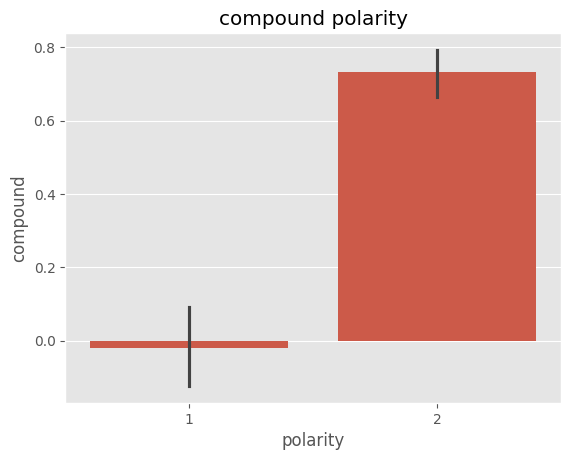

In [60]:
ax = sns.barplot(data= vaders_merged, x='polarity', y='compound')
ax.set_title('compound polarity')
plt.show()

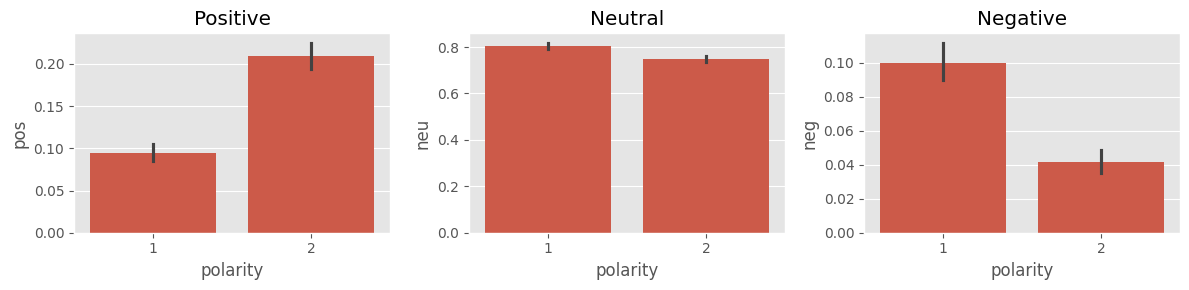

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_merged, x='polarity', y='pos', ax=axs[0])
sns.barplot(data=vaders_merged, x='polarity', y='neu', ax=axs[1])
sns.barplot(data=vaders_merged, x='polarity', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()